# Part II - Loan Data from Prosper Dashboard
## by <a href="https://github.com/Obed-Makori">Makori Obed</a>



## Investigation Overview


>In the presentation, to explore how loan characteristics relate to borrowers' annual percentage rates, numerous visualizations of loan characteristics will be developed. The key attributes are the BorrowerAPR, ProsperScore, AvailableBankcardCredit, and CreditScoreRangeUpper.


## Dataset Overview

> The Prosper Loan Data contains 113,937 loans with 81 variables including loan amount, interest rate, current loan status, borrower income, and many more. This data was pulled from Prosper.com, a peer-to-peer lending platform, in 2009. 

>The Prosper Loan Data is a great resource for anyone interested in peer-to-peer lending or looking to study the effects of different loan characteristics on loan performance. The data can be used to build models that predict loan default or loss, and can also be used to study the effects of different loan features on borrower behavior.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#loading the dataset
data=pd.read_csv("prosperLoanData.csv")

data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# filter out loans without ProsperScores
filtered_data= data[data['ProsperScore'].isnull()==False]


##### Distribution of Occupation

>##### Distribution of Occupation

> It is observed that most borrowers are not included in the known occupations. For known ocupations, most borrowers tend to be professional borrowers.

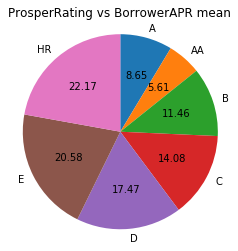

In [4]:
ProsperRating_mean = filtered_data.groupby('ProsperRating (Alpha)').BorrowerAPR.mean()
ProsperRating_mean

plt.pie(ProsperRating_mean, labels = ProsperRating_mean.index, startangle = 90,
    counterclock = False, autopct='%1.2f')
plt.axis('square') 
plt.title('ProsperRating vs BorrowerAPR mean');

## Correlation Plot of Critical Features

> No pair of individuals exhibits a positive relationship. Given that a higher AvailableBankcardCredit has a better credit score, it makes logical. The relationship between BorrowerAPR and ProsperScore is unfavorable since borrowers with lower scores are more likely to have higher APRs. Similar to this, a better CreditScore indicates more reliable borrowers, which results in a reduced APR.

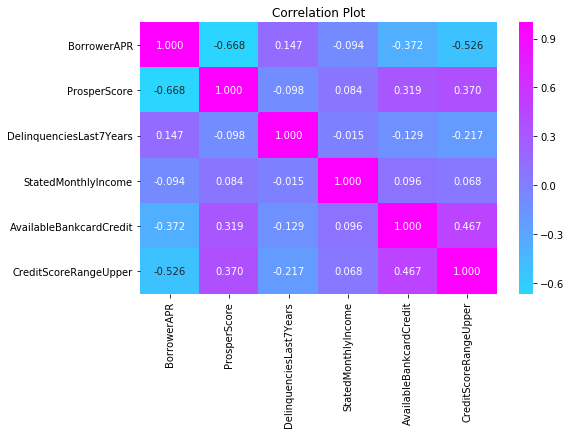

In [5]:
# correlation plot 

num_vars = ['BorrowerAPR', 'ProsperScore', 'DelinquenciesLast7Years', 
            'StatedMonthlyIncome', 'AvailableBankcardCredit', 'CreditScoreRangeUpper']

plt.figure(figsize = [8, 5])
sb.heatmap(filtered_data[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'cool', center = 0)
plt.title('Correlation Plot') 
plt.show()

## ProsperScore Distribution

>It is observed that the number of borrowers increases as the score decreases.

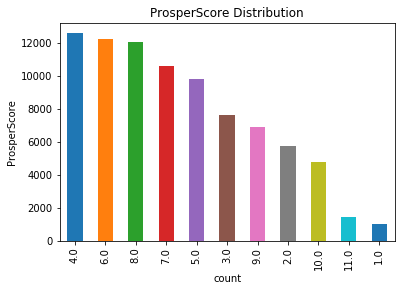

In [6]:
filtered_data['ProsperScore'].value_counts().plot(kind='bar')
plt.title('ProsperScore Distribution')
plt.xlabel('count')
plt.ylabel('ProsperScore')
plt.fontsize = 12
plt.figsize=(12,12)

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_LoanDatafromProsper.ipynb --to slides --post serve --no-input --no-prompt